<a href="https://colab.research.google.com/github/tushargirinath/Brain-Tumor-Detection-VGG16-Ensemble/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ STEP 1: Install Kaggle API
!pip install -q kaggle

# ✅ STEP 2: Upload your Kaggle API token (kaggle.json)
from google.colab import files
uploaded = files.upload()

# ✅ STEP 3: Move it to the correct location and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# Download the dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

# Unzip the downloaded file
# You'll need to find the exact name of the downloaded zip file.
# It's often the dataset name followed by .zip
!unzip -q brain-mri-images-for-brain-tumor-detection.zip

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 1.16GB/s]


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [ ]:
os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img=cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
      y.append(('N'))
      print(y)


  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'

<Figure size 1000x1000 with 0 Axes>

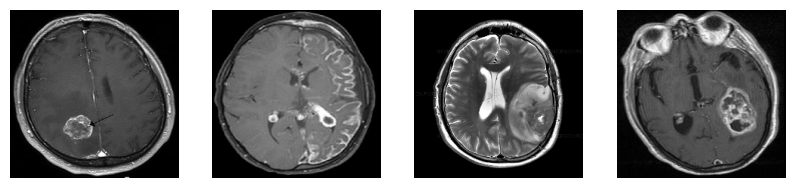

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(X[i], cmap="gray")
  plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (169, 224, 224, 3)
X_test Shape: (84, 224, 224, 3)
y_train Shape: (169, 2)
y_test Shape: (84, 2)


In [ ]:
from keras.applications import vgg16
img_rows, img_cols = 224, 224
vgg = vgg16.VGG16(weights = 'imagenet' ,
                  include_top = False,
                  input_shape = (img_rows, img_cols, 3))
# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
  layer.trainable = False
# Let's print our layers

for (i,layer) in enumerate(vgg.layers):
    print(str(i) +" "+ layer.__class__.__name__, layer.trainable)

# Removed the repeated and mis-indented line:
# input_shape = (img_rows, img_cols, 3))

# Also fixed typo in the second loop 'traindle' to 'trainable'
for (i,layer) in enumerate(vgg.layers):
    print(str(i) +" "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output

    top_model = GlobalAveragePooling2D()(top_model)
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output

    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model


In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D

from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D

from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

num_classes = 2

def FC_Head(vgg, num_classes):
    x = vgg.output
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    return x

model = Model(inputs = vgg.input, outputs = FC_Head(vgg, num_classes))

print(model.summary())

print(model.summary())


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,19

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 119,554,050 (456.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,19

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 119,554,050 (456.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6539 - loss: 131.0590 - val_accuracy: 0.8333 - val_loss: 12.8500
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.8701 - loss: 9.6791 - val_accuracy: 0.6786 - val_loss: 26.7371
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.8642 - loss: 10.9293 - val_accuracy: 0.8333 - val_loss: 33.9874
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.8584 - loss: 15.6558 - val_accuracy: 0.8571 - val_loss: 40.5503
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.9615 - loss: 6.2686 - val_accuracy: 0.8810 - val_loss: 28.4830


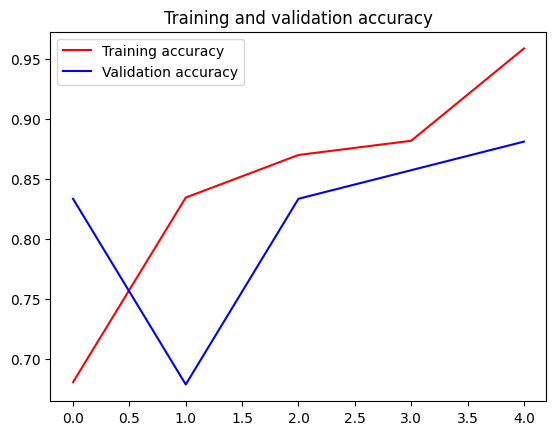

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Since the output is one-hot encoded, you can convert it back to class labels if needed
y_pred_classes = np.argmax(y_pred, axis=1)

# You can also compare with the true labels (y_test, which are also one-hot encoded)
y_test_classes = np.argmax(y_test, axis=1)

# Print the predictions and the true labels to see the results
print("Predicted classes:", y_pred_classes)
print("True classes:", y_test_classes)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step
Predicted classes: [1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 0 0 1 1 0 1 1 1]
True classes: [0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 1 1]


Saving Y195.JPG to Y195.JPG


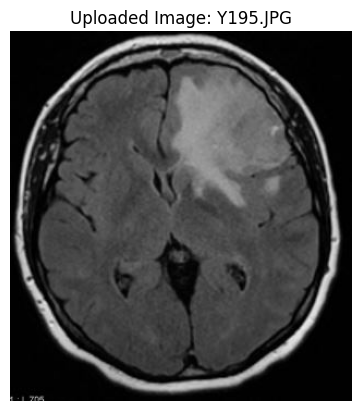

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction for Y195.JPG:
Prediction: Brain Tumor Detected


In [ ]:
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess the image
    img = cv2.imread(fn)
    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert for displaying with matplotlib
    img_resized = cv2.resize(img, (224, 224))
    img_array = np.array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Display the uploaded image
    plt.imshow(img_display)
    plt.title(f"Uploaded Image: {fn}")
    plt.axis('off')
    plt.show()

    # Make the prediction
    predictions = model.predict(img_array)

    # Interpret the prediction
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = le.inverse_transform([predicted_class_index])[0] # Use your LabelEncoder

    print(f"Prediction for {fn}:")
    if predicted_class_label == 'Y': # Assuming 'Y' corresponds to a tumor
        print("Prediction: Brain Tumor Detected")
    else: # Assuming 'N' corresponds to no tumor
        print("Prediction: No Brain Tumor Detected")

Saving N22.JPG to N22 (1).JPG


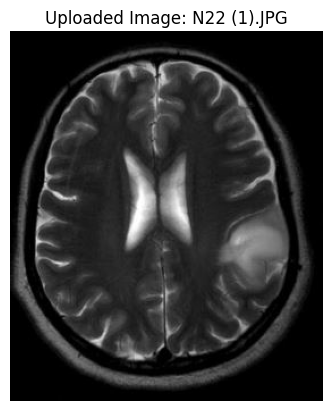

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for N22 (1).JPG:
Prediction: No Brain Tumor Detected


In [ ]:
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess the image
    img = cv2.imread(fn)
    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert for displaying with matplotlib
    img_resized = cv2.resize(img, (224, 224))
    img_array = np.array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Display the uploaded image
    plt.imshow(img_display)
    plt.title(f"Uploaded Image: {fn}")
    plt.axis('off')
    plt.show()

    # Make the prediction
    predictions = model.predict(img_array)

    # Interpret the prediction
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = le.inverse_transform([predicted_class_index])[0] # Use your LabelEncoder

    print(f"Prediction for {fn}:")
    if predicted_class_label == 'Y': # Assuming 'Y' corresponds to a tumor
        print("Prediction: Brain Tumor Detected")
    else: # Assuming 'N' corresponds to no tumor
        print("Prediction: No Brain Tumor Detected")

Saving Y92.png to Y92.png


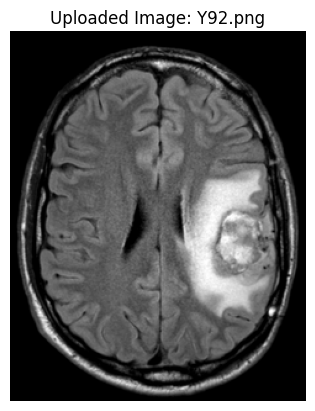

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction for Y92.png:
Prediction: Brain Tumor Detected


In [ ]:
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess the image
    img = cv2.imread(fn)
    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert for displaying with matplotlib
    img_resized = cv2.resize(img, (224, 224))
    img_array = np.array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Display the uploaded image
    plt.imshow(img_display)
    plt.title(f"Uploaded Image: {fn}")
    plt.axis('off')
    plt.show()

    # Make the prediction
    predictions = model.predict(img_array)

    # Interpret the prediction
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = le.inverse_transform([predicted_class_index])[0] # Use your LabelEncoder

    print(f"Prediction for {fn}:")
    if predicted_class_label == 'Y': # Assuming 'Y' corresponds to a tumor
        print("Prediction: Brain Tumor Detected")
    else: # Assuming 'N' corresponds to no tumor
        print("Prediction: No Brain Tumor Detected")